# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import convolve, correlate # 합성곱(convolution) 연산

from sklearn.datasets import load_sample_image  # 예제 이미지 로드
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras 

# Convolution(합성곱)

## 1차원 합성곱 

In [3]:
x = np.arange(1, 5)
x 

array([1, 2, 3, 4])

In [4]:
y = np.array([1, 2])
y 

array([1, 2])

In [5]:
y_flipped = np.flip(y)
y_flipped  # 좌/우가 반전된 배열

array([2, 1])

In [6]:
convolve(x, y, mode='valid')
#> mode='valid': 출력 길이 = len(x) - len(y) + 1 

array([ 4,  7, 10])

In [7]:
convolve(x, y, mode='same')
#> mode='same': 출력 길이 = len(x)
# 출력 배열의 길이가 원본 배열 x의 길이와 같아지도록 zero padding을 추가함 

array([ 1,  4,  7, 10])

In [8]:
convolve(x, y, mode='full')
#> mode='full': 출력 길이 = len(x) + len(y) - 1
# 원본 배열 x의 모든 원소가 동일한 횟수로 합성곱 연산에 기여할 수 있도록 zero padding을 추가

array([ 1,  4,  7, 10,  8])

## 2차원 합성곱 

In [9]:
x2 = np.arange(1, 17).reshape((4, 4))
x2 

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [10]:
y2 = np.array([[0, 1], [2, 0]])
y2 

array([[0, 1],
       [2, 0]])

In [11]:
np.flip(y2, axis=0) # 상/하 반전

array([[2, 0],
       [0, 1]])

In [12]:
np.flip(y2, axis=1) # 좌/우 반전

array([[1, 0],
       [0, 2]])

In [13]:
y2_flipped = np.flip(y2)  #상/하/좌/우 반전
y2_flipped

array([[0, 2],
       [1, 0]])

In [14]:
convolve(x2, y2, mode='valid')

array([[ 9, 12, 15],
       [21, 24, 27],
       [33, 36, 39]])

In [15]:
convolve(x2, y2, mode='same')

array([[ 0,  1,  2,  3],
       [ 2,  9, 12, 15],
       [10, 21, 24, 27],
       [18, 33, 36, 39]])

In [16]:
convolve(x2, y2, mode='full')

array([[ 0,  1,  2,  3,  4],
       [ 2,  9, 12, 15,  8],
       [10, 21, 24, 27, 12],
       [18, 33, 36, 39, 16],
       [26, 28, 30, 32,  0]])

# Cross-correlation(교차상관)

In [17]:
x

array([1, 2, 3, 4])

In [18]:
y

array([1, 2])

In [19]:
correlate(x, y, mode='valid')

array([ 5,  8, 11])

In [20]:
correlate(x, y, mode='same')

array([ 2,  5,  8, 11])

In [21]:
correlate(x, y, mode='full')

array([ 2,  5,  8, 11,  4])

# 이미지와 합성곱

In [22]:
china = load_sample_image('china.jpg')
flower = load_sample_image('flower.jpg')

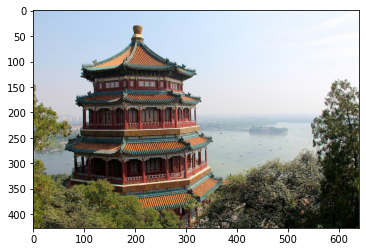

In [23]:
plt.imshow(china)
plt.show()

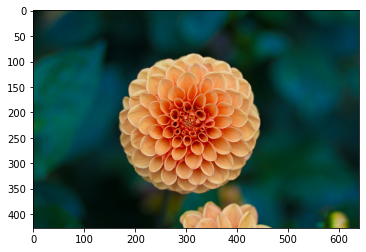

In [24]:
plt.imshow(flower)
plt.show()

In [25]:
china.shape  #> (height, width, depth)

(427, 640, 3)

In [26]:
flower.shape

(427, 640, 3)

In [27]:
china.dtype  #unit8: unsigned integer 8bits (0 ~ 255)

dtype('uint8')

In [28]:
np.min(china), np.max(china)

(0, 255)

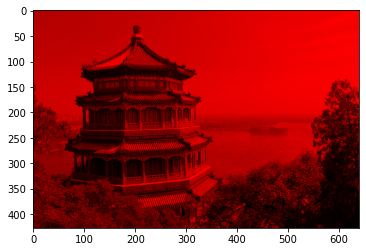

In [29]:
china_red = china.copy()
china_red[:, :, 1:3] = 0  # Green, Blue의 모든 픽셀들의 값을 0으로 세팅
plt.imshow(china_red)
plt.show()

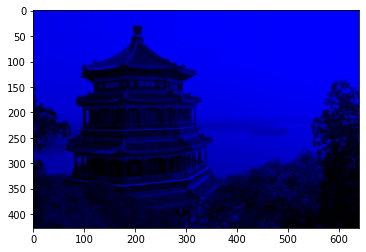

In [30]:
china_blue = china.copy()
china_blue[:, :, 0:2] = 0
plt.imshow(china_blue)
plt.show()

In [31]:
filter = np.zeros(shape=(3, 3, 3))
filter[:, :, 2] = 1
conv = correlate(china, filter, mode='same')
conv.shape

(427, 640, 3)

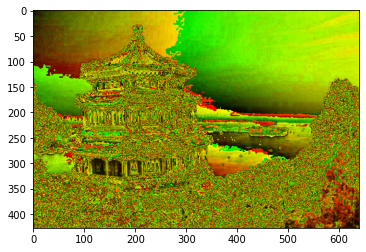

In [32]:
plt.imshow(conv.astype(np.uint8))
plt.show()

# CNN(Convolutional Neural Network, 합성곱 신경망) 

CNN(Convolutional Neural Network) 

* filter: 합성곱 층(layer)의 뉴런(unit)
* kernel: 합성곱 층의 입력에 곱해지는 가중치(weight) 
* feature map(특성 맵): 합성곱 연산을 통해서 계산된 출력 
* padding: 입력 배열 주위에 0으로 채우는 것 
    * same padding: 입력 배열과 출력 특성 맵의 크기를 동일하게 하기 위해서 0을 채우는 방식 
    * valid padding: 패딩이 없는 입력 배열로 합성곱 연산을 수행하는 것. 특성 맵의 크기는 입력 배열의 크기보다 작아짐 
    * 보통 same padding을 사용함 
* stride(보폭): filter를 이동시키는 간격(보폭). stride 기본값은 1
* pooling: 값이 없는 투명한 윈도우 
    * max pooling: filter 안의 입력값들 중에서 최댓값을 선택하는 pooling 
    * average pooling: filter 안의 입력값들의 평균을 계산해서 사용 
    * pooling은 학습을 해야 하는 가중치가 없음
    * 일반적으로 pooling 필터를 이동시킬 때는 stride 값을 pooling 필터의 크기와 동일하게 움직임 
    * 일반적으로 pooling에서는 패딩을 사용하지 않음(valid padding). 이미지 압축이 목적이기 때문에.
    * 평균 풀링은 특성 맵의 중요한 정보들을 희석시킬 수 있기 때문에, 많은 경우에 평균 풀링보다 최대 풀링을 더 많이 사용함 
    * 합성곤에서 stride를 크게해서 특성맵의 크기를 줄이는 것보다 풀링 층에서 크기를 줄이는 것이 경험적으로 더 나은 성능을 내기 때문에 풀링을 사용함 

## Fashion MNIST datasets

In [33]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [34]:
x_train_full.shape  #> (n_samples, height, width)

(60000, 28, 28)

In [35]:
x_test.shape

(10000, 28, 28)

keras의 합성곱 층은 3차원 입력(height, width, depth)을 기대하기 때문에, MNIST처럼 흑백 이미지이더라도 depth=1인 3차원 형태로 변환을 할 필요가 있음 

In [36]:
x_train_full_scaled = x_train_full.reshape((-1, 28, 28, 1))
x_train_full_scaled.shape

(60000, 28, 28, 1)

In [37]:
x_test_scaled = x_test.reshape((-1, 28, 28, 1))
x_test_scaled.shape

(10000, 28, 28, 1)

0 ~ 255 사이의 픽셀 값들을 0.0 ~ 1.0 사이의 값들로 스케일링 

In [38]:
np.min(x_train_full_scaled), np.max(x_train_full_scaled)

(0, 255)

In [39]:
x_train_full_scaled = x_train_full_scaled / 255
x_test_scaled = x_test_scaled / 255

In [40]:
np.min(x_train_full_scaled), np.max(x_train_full_scaled)

(0.0, 1.0)

전체 훈련 셋을 훈련 셋(train set)과 검증 셋(validation set)으로 분리 

In [41]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full_scaled, y_train_full,
                                                  test_size=0.1,
                                                  stratify=y_train_full,
                                                  random_state=42)

In [42]:
x_train.shape, y_train.shape

((54000, 28, 28, 1), (54000,))

In [43]:
x_val.shape, y_val.shape

((6000, 28, 28, 1), (6000,))

## CNN 모델 생성/훈련 

convolution layer(filters=32개 (3, 3) 모양)

--> max pooling 

--> convolution layer(filters=64개 (3, 3) 모양)

--> max pooling

--> flatten --> Dense(units=100) --> Dropout(rate=0.4) --> output layer 

In [44]:
# Sequential 모델 생성 
model = keras.Sequential()

# 합성곱 층 추가
model.add(keras.layers.Convolution2D(filters=32, kernel_size=3, padding='same',
                                     activation='relu', input_shape=(28, 28, 1)))

# 최대 풀링 층 추가
model.add(keras.layers.MaxPooling2D())

# 두번째 합성곱 층 추가
model.add(keras.layers.Convolution2D(filters=64, kernel_size=3, padding='same',
                                     activation='relu', input_shape=(28, 28, 1)))

# 두번째 최대 풀링 층 추가 
model.add(keras.layers.MaxPooling2D())

# Flatten 층 추가 
model.add(keras.layers.Flatten())
# Dense 층 추가 
model.add(keras.layers.Dense(units=100, activation='relu'))
# Dropout 층 추가
model.add(keras.layers.Dropout(rate=0.4))
# Output 층 추가 
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [46]:
7*7*64

3136

In [47]:
# param
#> (3 x 3 + 1 ) *32 = 320
#> (3 x 3 x 32 + 1) x 64 = 18,496
#> (3136 + 1) x 100 = 313,700
#> (100 + 1) x 100 = 1,010

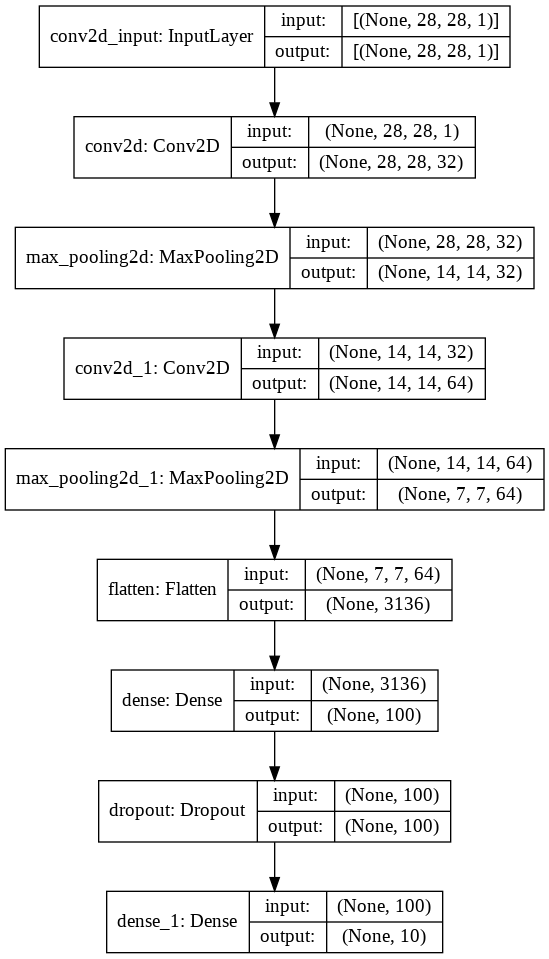

In [48]:
keras.utils.plot_model(model, show_shapes=True)

In [49]:
# 모델 컴파일: 최적화 알고리즘, 손실 함수, 평가 지표 설정
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [50]:
# 모델 훈련: 콜백(모델 자동 저장 + 훈련 조기 종료) 적용
checkpoint = keras.callbacks.ModelCheckpoint(filepath='best_cnn.h5', save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [51]:
history = model.fit(x_train, y_train, epochs=30, 
                    validation_data=(x_val, y_val), 
                    callbacks=[checkpoint, early_stop])

Epoch 1/30
1688/1688 [==============================] - 38s 3ms/step - loss: 0.7057 - accuracy: 0.7457 - val_loss: 0.3132 - val_accuracy: 0.8852
Epoch 2/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3646 - accuracy: 0.8699 - val_loss: 0.2637 - val_accuracy: 0.9070
Epoch 3/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3022 - accuracy: 0.8902 - val_loss: 0.2441 - val_accuracy: 0.9107
Epoch 4/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2677 - accuracy: 0.9007 - val_loss: 0.2150 - val_accuracy: 0.9205
Epoch 5/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2451 - accuracy: 0.9111 - val_loss: 0.2221 - val_accuracy: 0.9175
Epoch 6/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2121 - accuracy: 0.9216 - val_loss: 0.2128 - val_accuracy: 0.9187
Epoch 7/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2015 - accuracy: 0.9265 - val_loss: 0.2012 - val_accuracy

In [52]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [53]:
hist = pd.DataFrame(history.history)
hist.tail()

,loss,accuracy,val_loss,val_accuracy
6,0.204726,0.925333,0.201218,0.922667
7,0.191087,0.929648,0.209124,0.920333
8,0.178169,0.933241,0.191151,0.929833
9,0.164337,0.937648,0.203665,0.928333
10,0.153542,0.941815,0.210946,0.928500


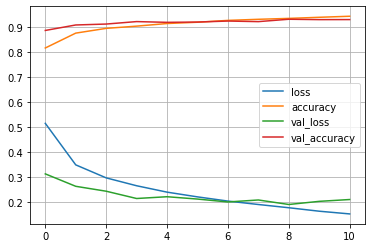

In [54]:
hist.plot()
plt.grid()
plt.show()

In [55]:
# 일반화 성능 추정
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2278 - accuracy: 0.9180


[0.22776801884174347, 0.9179999828338623]

In [56]:
# 테스트 셋 데이터 예측 결과 
x_new = x_test_scaled[:2]  # 샘플 2개
y_pred = model.predict(x_new)  # 2개의 예측 확률 

In [57]:
y_pred

array([[8.36024652e-11, 1.84449664e-10, 9.80009260e-13, 1.05660036e-10,
        8.10960728e-13, 1.47629621e-07, 3.49722638e-12, 4.53868706e-05,
        2.66665735e-11, 9.99954462e-01],
       [5.72916269e-06, 2.35836292e-15, 9.99985099e-01, 4.99766184e-09,
        2.87882381e-06, 3.39894416e-16, 6.32226329e-06, 1.17306505e-20,
        1.51055264e-12, 2.79287401e-19]], dtype=float32)

In [58]:
 np.argmax(y_pred, axis=1) # 예측값 

array([9, 2])

In [59]:
y_test[:2]  # 실제값(타겟)

array([9, 2], dtype=uint8)

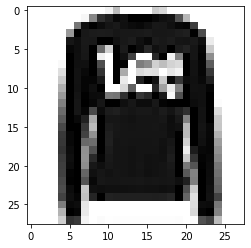

In [60]:
plt.imshow(x_test[1], cmap=plt.cm.binary)
plt.show()

In [61]:
# 예측이 맞았는지 체크
np.argmax(y_pred, axis=1) == y_test[:2]

array([ True,  True])

# CNN 시각화 

* 각 합성곱 층이 가지고 있는 필터들 시각화
    * 훈련 전 필터들의 (랜덤) 초기화 상태
    * 훈련 후 필터들 상태
* 이미지가 각 합성곱 층을 통과했을 때 출력 시각화 
    * (28, 28) 크기의 이미지 32개 
    * (14, 14) 크기의 이미지 64개 

## 훈련 전 모델 생성 

In [62]:
not_train_model = keras.Sequential()
not_train_model.add(keras.layers.Convolution2D(filters=32, kernel_size=3, padding='same',
                                               activation='relu', input_shape=(28, 28, 1)))

In [63]:
# 모델이 가지고 있는 층(layers)들
not_train_model.layers

In [64]:
# 모델의 첫번째 층
not_train_model.layers[0].weights
#> weights[0]: kernel(필터). 난수로 초기화
#> weights[1]: bias. 0으로 초기화 

[<tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 0.02395615,  0.03162014,  0.02235538,  0.11228643,
            0.1273021 , -0.03385559,  0.05969507, -0.12501891,
           -0.03271433, -0.09300388,  0.08685085,  0.049211  ,
           -0.00576553,  0.09049062,  0.00184649,  0.04069369,
           -0.01486732,  0.04899006,  0.02842687,  0.11668684,
           -0.13506332, -0.07185313,  0.00049499, -0.00843914,
           -0.04236623,  0.12155326, -0.06009256, -0.12093603,
           -0.1420795 ,  0.11834826,  0.12434201, -0.07117125]],
 
         [[-0.13442326, -0.08408575, -0.03994152, -0.00725593,
           -0.09992188,  0.1208766 , -0.03686465, -0.1152678 ,
           -0.12034388, -0.10323169,  0.02350657, -0.09527277,
            0.09163049, -0.13376598, -0.12210064, -0.01934934,
            0.04690896,  0.03454134,  0.02314888, -0.04551629,
           -0.00532052,  0.04826276, -0.01487529, -0.12223378,
           -0.05834431,  0.04949307,  

In [65]:
# 첫번재 층의 커널 
kernel = not_train_model.layers[0].weights[0].numpy()  # Tensor가 가지고 있는 numpy 배열을 리턴 
kernel.shape  #> (kernel_height, kernel_width, depth, n_kernels)

(3, 3, 1, 32)

In [66]:
# 커널을 1차원 배열로 변환 후 히스토그램
kernel_1d = kernel.reshape((-1,))
kernel_1d.shape

(288,)

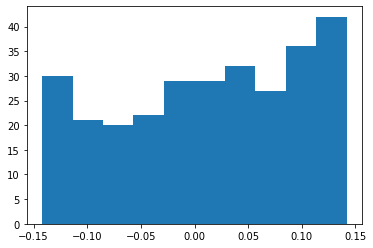

In [67]:
plt.hist(kernel_1d)
plt.show()
#> 비교적 고른 분포: tensorflow는 신경망의 가중치들을 초기화할때 균등분포에서 난수를 선택 

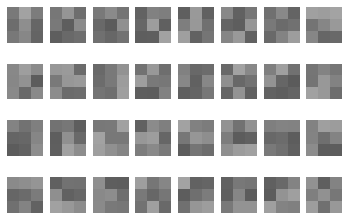

In [68]:
# 훈련 전의 필터 시각화 
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(4):  # subplot의 행 개수만큼 반복 
    for j in range(8):  # subplot의 열 개수만큼 반복 
        idx = i * 8 + j 
        filter = kernel[:, :, 0, idx]  # (3, 3) 배열 
        ax[i, j].imshow(filter, cmap=plt.cm.binary, vmin=-0.5, vmax=0.5)
        # vmin, vmax: 이미지 픽셀 값의 최솟값, 최댓값을 설정. 컬러맵이 표현할 범위 지정 
        ax[i, j].axis('off')

plt.show()

## 훈련 후 모델의 필터 시각화 

In [69]:
# 훈련된 모델이 가지고 있는 층들(layers) 
model.layers

In [70]:
# 첫번재 층의 커널
conv1_filters = model.layers[0].weights[0].numpy()
conv1_filters.shape

(3, 3, 1, 32)

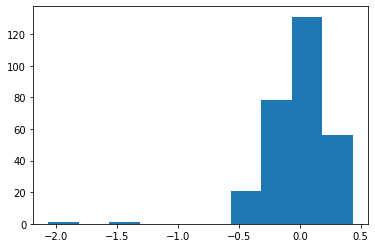

In [71]:
conv1_filters_1d = conv1_filters.reshape((-1,))
plt.hist(conv1_filters_1d)
plt.show()
# 훈련 후에는 가중치들(필터의 값)이 훈련되어서 특정 분포를 따르는 것처럼 보임

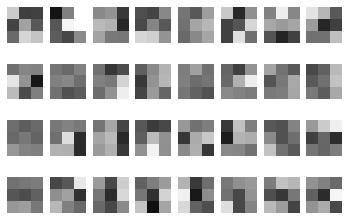

In [72]:
# 32개 필터를 시각화
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(4):
    for j in range(8):
        idx = i * 8 + j
        filter = conv1_filters[:, :, 0, idx]
        ax[i, j].imshow(filter, cmap=plt.cm.binary, vmin=-0.5, vmax=0.5)
        ax[i, j].axis('off')

plt.show()

## 필터를 통과한 이미지 시각화(Convolution 효과)

In [73]:
model.input  # input layer 

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [74]:
conv1 = model.layers[0]  # 첫번째 convolution layer 
conv1

In [75]:
conv1.output

<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d')>

In [76]:
# input layer와 첫번재 conv layer의 출력을 연결한 객체 
conv1_out = keras.Model(model.input, conv1.output)

In [77]:
# 첫번재 conv layer를 통과할 이미지
sample = x_test_scaled[:1]
sample.shape

(1, 28, 28, 1)

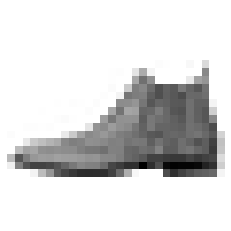

In [78]:
plt.imshow(sample[0].reshape((28,28)), cmap=plt.cm.binary)
plt.axis('off')
plt.show()

In [79]:
feature_maps = conv1_out.predict(sample)
feature_maps.shape

(1, 28, 28, 32)

(28, 28)


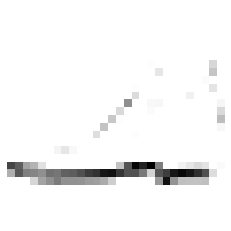

In [80]:
print(feature_maps[0, :, :, 0].shape)
plt.imshow(feature_maps[0, :, :, 0], cmap=plt.cm.binary)
plt.axis('off')
plt.show()

<function matplotlib.pyplot.show>

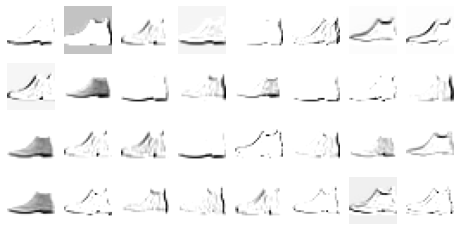

In [86]:
fig, ax = plt.subplots(nrows=4, ncols=8, figsize=(8, 4))
for i in range(4):
    for j in range(8): 
        idx = i * 8 + j
        fm = feature_maps[0, :, :, idx]
        ax[i, j].imshow(fm, cmap=plt.cm.binary)
        ax[i, j].axis('off')
        
plt.show

두번째 conv layer를 통과한 feature map을 시각화 

In [82]:
model.layers[2]

In [83]:
# keras.Model(input_layer, 두번째 conv_layer의 출력) 생성 
conv2_out = keras.Model(model.input, model.layers[2].oputput)
# 샘플을 예측(predict) -> conv layer의 출력 
feature_maps2 = conv2_out.predict(sample)
feature_maps2.shape

(1, 14, 14, 64)

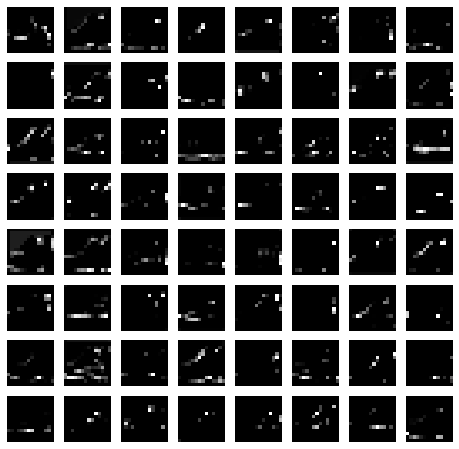

In [89]:
# 64개 dml feature map을 시각화 
fig, ax = plt.subplots(nrows=8, ncols=8, figsize=(8, 8))
for i in range(8):
    for j in range(8): 
        idx = i * 8 + j
        fm = feature_maps2[0, :, :, idx]
        ax[i, j].imshow(fm, cmap=plt.cm.gray)
        ax[i, j].axis('off')
        
plt.show()